# Desafío 2: Rendimiento escolar

1) Preliminares
---

### Problema

El problema consiste en el desarrollo de un modelo predictivo de **regresión** para predecir, en base a atributos sociodemográficos y conductuales de alumnos, las notas de los alumnos.

A continuación se presenta el modelo a estimar:

$$Y={{\beta }_{0} + \sum_{i=1} {\beta }_{i} \cdot {X_{i}}}$$

Donde $X_{i}$ corresponden a los atributos sociodemográficos y conductuales, mientras que $Y$ es el vector objetivo a estimar (notas)

### Métricas de desempeño

Como este es un problema de regresión, se utilizarán las siguientes dos métricas:

- **Promedio del Error Cuadrático (Mean Squared Error)**: Representa la expectativa del error cuadrático. Es un indicador de calidad con valores no negativos, donde menores valores indican mejores niveles de ajuste.
- **R-cuadrado**: Representa la capacidad explicativa de nuestro conjunto de atributos en la variabilidad de nuestro vector objetivo.

### Descripción de la base de datos

- school : Escuela del estudiante. (binaria: 'GP' - Gabriel Pereira o 'MS' - Mousinho da Silveira)
- sex : Sexo del estudiante. (binaria: 'F' - Mujer o 'M' - Hombre)
- age : Edad del estudiante. (numérica: de 15 a 22)
- address : Ubicación de la casa del estudiante. (binaria: 'U' - urbana o 'R' - rural)
- famsize : Tamaño de la familia. (binaria: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
- Pstatus : Estado cohabitacional de los padres. (binaria: 'T' - cohabitando juntos o 'A' - viviendo separados)
- Medu : Nivel educacional de la madre. (numérica: 0 - ninguno, 1 - educación básica (4to), 2 - de 5to a 9, 3 - educación media, o 4 - educación superior).
- Fedu : Nivel educacional del padre. (numérica: 0 - ninguno, 1 - educación básica (4to), 2 - de 5to a 9, 3 - educación media, o 4 - educación superior).
- Mjob : Ocupación de la madre. (nominal: 'teacher' profesora, 'health' relacionada a salud, 'services' (e.g. administración pública o policía), 'at_home' en casa u 'other' otra).
- Fjob : Ocupación del padre (nominal: 'teacher' profesor, 'health' relacionado a salud, 'services' (e.g. administración pública o policía), 'at_home' en casa u 'other' otra).
- reason : Razón para escoger la escuela (nominal: 'home' cercano a casa, 'reputation' reputación de la escuela, 'course' preferencia de cursos u 'other' otra)
- guardian : Apoderado del estudiante (nominal: 'mother' madre, 'father' padre u 'other' otro)
- traveltime : Tiempo de viaje entre hogar y colegio. (numeric: 1 - <15 min., 2 - 15 a 30 min., 3 - 30 min. a 1 hora, or 4 - >1 hora).
- studytime : Horas semanales dedicadas al estudio. (numérica: 1 - <2 horas, 2 - 2 a 5 horas, 3- 5 a 10 horas, o 4 - >10 horas)
- failures : Número de clases reprobadas. (numérica: n si 1<=n<3, de lo contrario 4)
- schoolsup : Apoyo educacional del colegio. (binaria: si o no)
- famsup : Apoyo educacional familiar. (binaria: si o no)
- paid : Clases particulares pagadas (matemáticas o portugués) (binaria: si o no)
- activities : Actividades extracurriculares. (binaria: si o no)
- nursery : Asistió a guardería infantil. (binaria: si o no)
- higher : Desea proseguir estudios superiores (binaria: si o no)
- internet : Acceso a internet desde el hogar (binaria: si o no)
- romantic : Relación romántica (binaria: si o no)
- famrel : Calidad de las relaciones familiares. (numérica: de 1 - muy malas a 5 - excelentes)
- freetime : Tiempo libre fuera del colegio (numérica: de 1 - muy poco a 5 - mucho)
- goout : Salidas con amigos (numérica: de 1 - muy pocas a 5 - muchas)
- Dalc : Consumo de alcohol en día de semana (numérica: de 1 - muy bajo a 5 - muy alto)
- Walc : Consumo de alcohol en fines de semana (numérica: de 1 - muy bajo a 5 - muy alto)
- health : Estado de salud actual (numérica: from 1 - muy malo to 5 - muy bueno)
- absences : Cantidad de ausencias escolares (numérica: de 0 a 93)
- G1 : Notas durante el primer semestre (numérica: de 0 a 20). Este es uno de sus vectores objetivos para el modelo descriptivo.
- G2 : Notas durante el segundo semestre (numérica: de 0 a 20). Este es uno de sus vectores objetivos para el modelo descriptivo.
- G3 : Promedio final (numérica: de 0 a 20). Este es uno de sus vectores objetivos para el modelo descriptivo y el vector a predecir en el modelo predictivo.

2) Aspectos computacionales
---

### Librerías a utilizar

- `pandas`: manipulación y análisis de datos.
- `numpy`: biblioteca de funciones matemáticas de alto nivel para operar con vectores o matrices.
- `scipy.stats`: contiene una gran cantidad de distribuciones de probabilidad y de funciones estadísticas.
- `matplotlib.pyplot`: nos permite mostrar gráficos.
- `seaborn`: librería especializada para gráficos estadísticos.
- `sklearn`: herramientas para análisis de datos y minería de datos. En particular se utilizará:
    - `linear_model`: módulo para trabajar con regresión donde el valor target es una combinación lineal de los features. Utilizaremos en este caso `LogisticRegression`.
    - `metrics`: módulo para obtener métricas de nuestros modelos (`mean_squared_error`, `r2_score`).
    - `model_selection`: de aquí se utilizará `train_test_split` para dividir nuestro datos en un set de entrenamiento y en un set de validación.
    - `preprocessing`: funciones para transformar datos en una representación más adecuada para los estimadores.
- `statsmodel`: provee clases y funciones para la estimación de distintos modelos estadísticos, así como para la realización de pruebas estadísticas y la exploración de datos estadísticos.
- `missingno`: librería para la visualización de datos perdidos.
- `factor_analyzer`: librería para el análisis factorial.
- `warnings`: será utilizada para evitar avisos de deprecación.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
import factor_analyzer as factor
import missingno as msngo
import warnings

warnings.filterwarnings('ignore')

### Funciones

- `get_dummies(df, columns)`, función que convierte variables categóricas en variables dummy.
- `humanize(col_name)`, retorna un string que representa el nombre de la columna en español.
- `plot_columns_behaviour(df, kind)`, función que dado un `DataFrame` `df` y genera un gráfico para cada columna dependiendo del parámetro kind (displot o catplot).
- `run_hip_test(df, col_name, group_by)`, función que hace un test de hipótesis para saber si la media de los grupos creados a partir de la columna binaria group_by son iguales (con un 95% de significancia). Retorna true cuando podemos rechazar la hipótesis de que las medias son iguales.
- `graph_hist(df, col_name, group_by)`, muestra un histograma de la columna segmentado por la variable binaria group_by
- `plot_main_correlations(df, threshold)`, grafica las principales correlaciones del dataframe, basado en un valor umbral (correlaciones tal que > threshold)
- `plot_worst_correlations(df, threshold)`, grafica las correlaciones que sean menor al valor umbral.
- `build_model(df, model, target, *banned_columns)`, construye un modelo de regresión para el dataframe entregado, donde la variable independiente es `target`, las variables independientes son todas las columnas del dataframe exceptuando `target` y las columnas excluidas (`banned_columns`).
- `not_significant_pvalues(model)`, entrega un listado con los `p-values` no significativos (al 95%) del modelo entregado.
- `significant_pvalues(model)`, entrega un listado con los `p-values` significativos (al 95%) del modelo entregado.

In [2]:
# Importar las funciones auxiliares
import auxiliary as nicos

### Proceso de preprocesamiento y recodificación de datos

El proceso de preprocesamiento y recodificación de los datos consistirá en lo siguiente:

1. Análisis de cada columna (tipos de datos).
2. Resolución de anomalías.
3. Recodificación de las variables binarias como 0 y 1. Se asignará 1 a aquellas categorías minoritarias.
4. Recodificación de las variables nominales con más de 2 categorías.

In [3]:
original_df = pd.read_csv('students.csv', sep='|')
original_df.head(5)

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,GP,F,nulidade,U,GT3,A,4,4,at_home,...,4,3,"""4""",1,1,"""3""",6,5,6,6
1,1,GP,F,"""17""",U,GT3,T,1,1,at_home,...,5,3,"""3""",1,1,"""3""",4,5,5,6
2,2,GP,F,"""15""",U,LE3,T,1,1,at_home,...,4,3,"""2""",2,3,"""3""",10,zero,8,10
3,3,GP,F,"""15""",U,GT3,T,4,2,health,...,3,2,"""2""",1,1,"""5""",2,15,14,15
4,4,GP,F,sem validade,U,GT3,T,3,3,other,...,4,3,"""2""",1,2,"""5""",4,6,10,10


#### Análisis de cada columna

In [4]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 34 columns):
Unnamed: 0    395 non-null int64
school        395 non-null object
sex           395 non-null object
age           395 non-null object
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null object
Fedu          395 non-null object
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null object
studytime     395 non-null object
failures      395 non-null object
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null object
freetime      395 non-null object
goout       

Debido a que hay datos perdidos y strings, varias columnas quedaron como `object`. Notar que `G2` quedó bien codificada (está como `int64`)

#### Resolución de anomalías

In [5]:
# 2.1) Eliminar unnamed column
df1 = original_df.drop(columns=['Unnamed: 0'])

df1.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,nulidade,U,GT3,A,4,4,at_home,teacher,...,4,3,"""4""",1,1,"""3""",6,5,6,6
1,GP,F,"""17""",U,GT3,T,1,1,at_home,other,...,5,3,"""3""",1,1,"""3""",4,5,5,6
2,GP,F,"""15""",U,LE3,T,1,1,at_home,other,...,4,3,"""2""",2,3,"""3""",10,zero,8,10


In [6]:
# 2.2) Para cada columna, reemplazar los casos perdidos
df2 = df1.copy()

numeric = [
    'age',
    'Medu',
    'Fedu',
    'traveltime',
    'studytime',
    'failures',
    'famrel',
    'freetime',
    'goout',
    'Dalc',
    'Walc',
    'health',
    'absences',
    'G1',
    'G2',
    'G3',
]

for col_name in df2:
    missing = df2[col_name].isin(['nulidade', 'zero', 'sem validade'])
    missing_count = sum(missing)
    if missing_count > 0:
        if col_name in numeric:
            df2.loc[missing, col_name] = np.nan
        else:
            df2.loc[missing, col_name] = None

df2.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,NaN,U,GT3,A,4,4,at_home,teacher,...,4,3,"""4""",1,1,"""3""",6,5,6,6
1,GP,F,"""17""",U,GT3,T,1,1,at_home,other,...,5,3,"""3""",1,1,"""3""",4,5,5,6
2,GP,F,"""15""",U,LE3,T,1,1,at_home,other,...,4,3,"""2""",2,3,"""3""",10,NaN,8,10


In [7]:
# 2.3) Columnas que son número pero que están como string
df3 = df2.copy()

for col_name in ['age', 'goout', 'health']:
    not_null = df3[col_name].notnull()
    df3.loc[not_null, col_name] = df3[not_null][col_name].apply(lambda n: int(n.replace('"', '')))
    
for col_name in numeric:
    not_nan = df3[col_name].notnull()
    df3.loc[not_nan, col_name] = df3[not_nan][col_name].astype('int')

df3.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,NaN,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,NaN,8,10


In [8]:
df = nicos.get_dummies(df3)

survey_columns = ['famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'studytime', 'traveltime']
df = nicos.get_dummies(df, columns=survey_columns)

df.head(5)

,age,Medu,Fedu,failures,absences,G1,G2,G3,school_MS,sex_M,...,health_3,health_4,health_2,health_1,studytime_1,studytime_3,studytime_4,traveltime_2,traveltime_3,traveltime_4
1,17,1,1,0,4,5,5,6,0,0,...,1,0,0,0,0,0,0,0,0,0
3,15,4,2,0,2,15,14,15,0,0,...,0,0,0,0,0,1,0,0,0,0
5,16,4,3,0,10,15,15,15,0,1,...,0,0,0,0,0,0,0,0,0,0
6,16,2,2,0,0,12,12,11,0,1,...,1,0,0,0,0,0,0,0,0,0
7,17,4,4,0,6,6,5,6,0,0,...,0,0,0,1,0,0,0,1,0,0


3) Descripción
---

### Análisis de valores perdidos

Vamos a ver cómo se distribuyen los datos perdidos a lo largo del dataset:

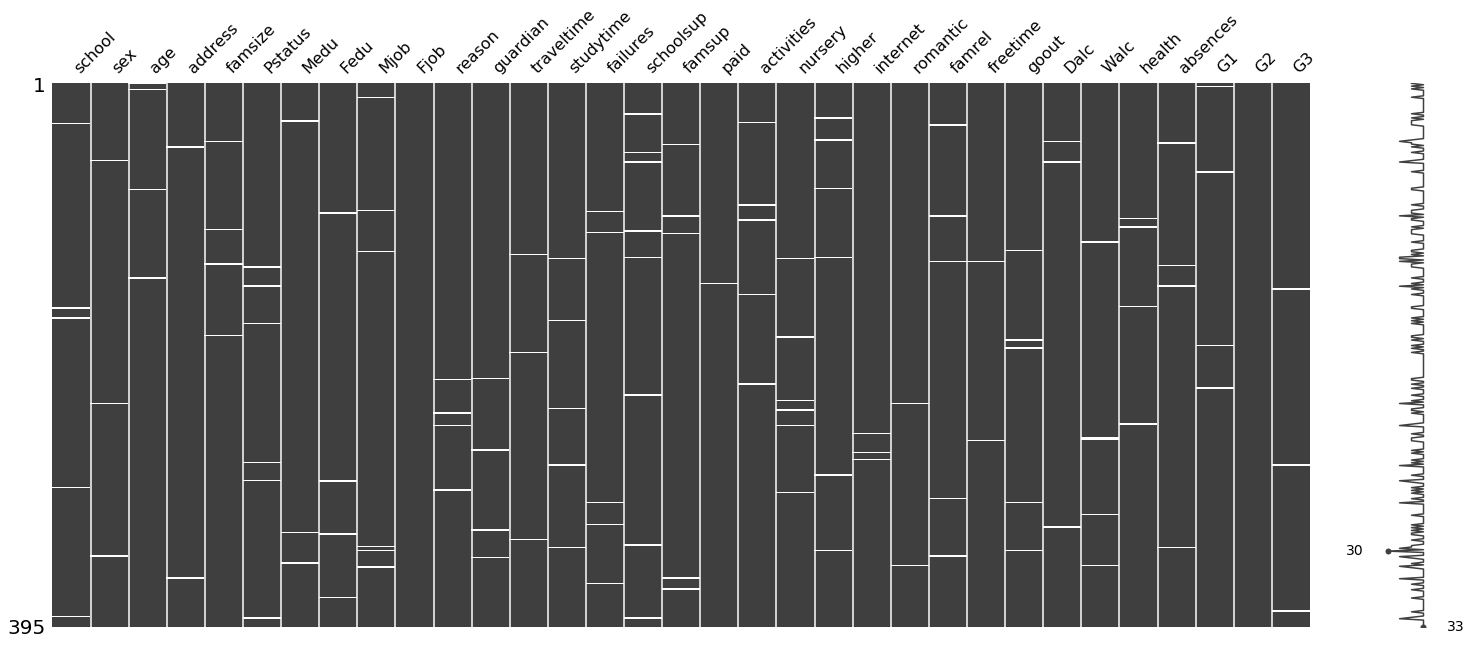

In [9]:
msngo.matrix(df3);

In [10]:
df3.isna().sum().sort_values(ascending=False).head(5)

schoolsup    8
higher       6
Pstatus      6
Mjob         6
nursery      6
dtype: int64

En general son pocos los datos perdidos para cada columna, pero, como aparece en el gráfico anterior, están repartido en distintas observaciones.

De hecho, si elimináramos las columnas con valores perdidos nos quedamos con un dataframe mucho más pequeño:

In [11]:
print('Perderíamos', df3.shape[0] - df3.dropna().shape[0])

Perderíamos 111


Perderíamos cerca del 30% de datos. Sin embargo, debido a la distribución de datos perdidos, parece ser la mejor opción para así no interferir con los resultados del modelo.

El dataframe final quedade la siguiente forma (obtenido en la sección anterior):

In [12]:
df.head(5)

,age,Medu,Fedu,failures,absences,G1,G2,G3,school_MS,sex_M,...,health_3,health_4,health_2,health_1,studytime_1,studytime_3,studytime_4,traveltime_2,traveltime_3,traveltime_4
1,17,1,1,0,4,5,5,6,0,0,...,1,0,0,0,0,0,0,0,0,0
3,15,4,2,0,2,15,14,15,0,0,...,0,0,0,0,0,1,0,0,0,0
5,16,4,3,0,10,15,15,15,0,1,...,0,0,0,0,0,0,0,0,0,0
6,16,2,2,0,0,12,12,11,0,1,...,1,0,0,0,0,0,0,0,0,0
7,17,4,4,0,6,6,5,6,0,0,...,0,0,0,1,0,0,0,1,0,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284 entries, 1 to 394
Data columns (total 64 columns):
age                  284 non-null int64
Medu                 284 non-null int64
Fedu                 284 non-null int64
failures             284 non-null int64
absences             284 non-null int64
G1                   284 non-null int64
G2                   284 non-null int64
G3                   284 non-null int64
school_MS            284 non-null int64
sex_M                284 non-null int64
address_R            284 non-null int64
famsize_LE3          284 non-null int64
Pstatus_A            284 non-null int64
Mjob_services        284 non-null int64
Mjob_teacher         284 non-null int64
Mjob_at_home         284 non-null int64
Mjob_health          284 non-null int64
Fjob_services        284 non-null int64
Fjob_teacher         284 non-null int64
Fjob_health          284 non-null int64
Fjob_at_home         284 non-null int64
reason_home          284 non-null int64
reason_reputati

### Análisis descriptivo

Ahora veremos un análisis descriptivo de las variables del dataset. 

Para esto, utilizaré el dataframe `df3` (aunque sin datos perdidos) el cual es igual al los datos original pero sin variables binarizadas. Esto es por facilidad para graficar la información.

In [14]:
data = df3.dropna().infer_objects()

#### Inspección visual vector objetivo

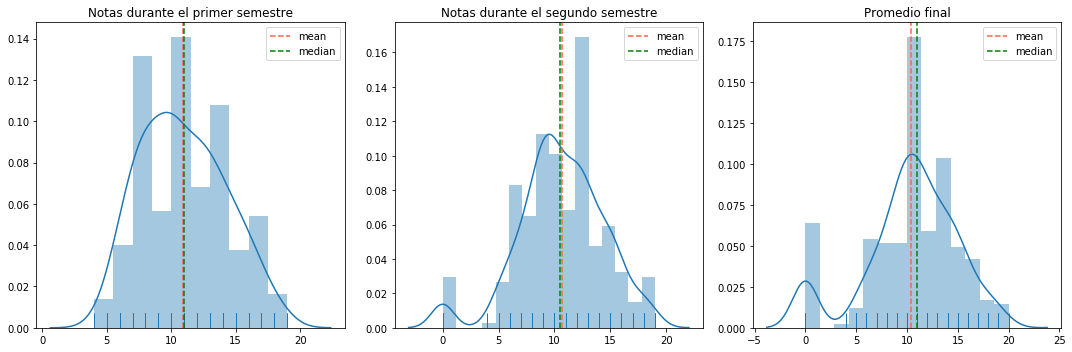

In [15]:
nicos.plot_columns_behaviour(data[['G1', 'G2', 'G3']], kind='numeric')

La media y la mediana en todos los vectores objetivos se ve muy similar, exceptuando el promedio final donde la frecuencia de promedios con 0 es mayor.

Para el promedio inicial, no hay observaciones con 0. Pero en el segundo semestre la frecuencia aumenta a 3% mientras que para el promedio final ésta se encuentra cercana a 6%.

#### Inspeción visual de Variables

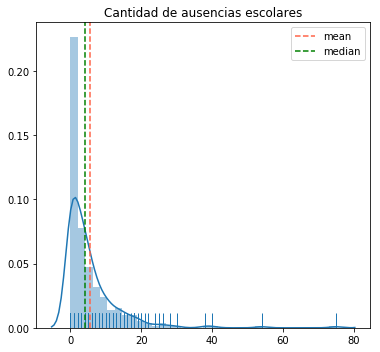

In [16]:
nicos.plot_columns_behaviour(data[['absences']], kind='numeric')

La cantidad de ausencias escolares se parece más a una expotencial, donde existen muchos alumnos sin ausencias, y a medida que aumentamos la cantidad de ausencias, la frecuencia disminuye considerablemente.

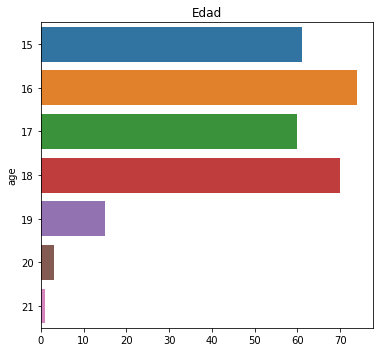

In [17]:
nicos.plot_columns_behaviour(data[['age']])

La edad si bien es numérica, queda mejor graficada con un `countplot` que con un histograma debido a que la cantidad de edades es bajo. 

Aquí la mayoría de alumnos tiene entre 15 y 18 años, mientras que unos pocos tienen edad 19 o más (los que probablemente hayan repetido alguna vez)

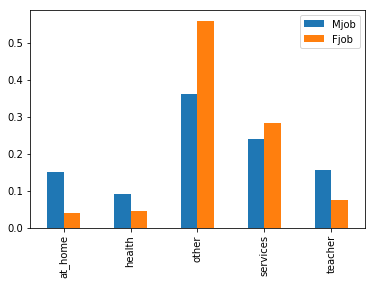

In [18]:
pd.concat([data['Mjob'].value_counts('%').to_frame(), data['Fjob'].value_counts('%').to_frame()], axis=1).plot.bar();

Comparativamente, las madres son las que mayoritariamente están en la casa (triplican la frecuencia comparado con los padres) y que trabajan principalmente en como profesoras o en algo relacionado a la salud (duplican en frecuencia comparado con los padres). Como la categoría de servicios está balanceada, los padres restantes están trabajando en otros tipos de trabajos.

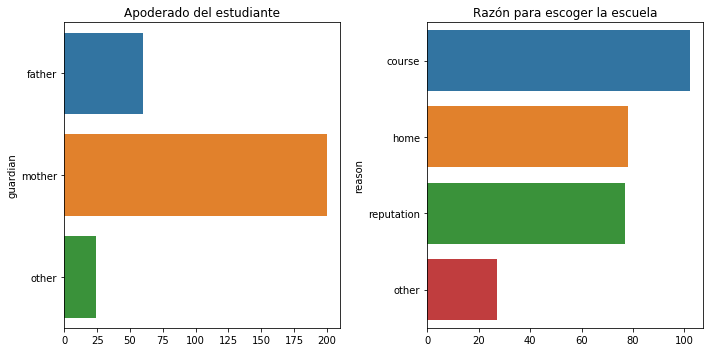

In [19]:
nicos.plot_columns_behaviour(data[['guardian', 'reason']])

La mayoría de apoderados son las madres, superando enormemente a las categorías de padre y de otros.

La razón para escoger la escuela está balanceado. La preferencia de cursos está en primer lugar, mientras que la reputación de la escuela y la cercanía con la casa están muy parecidas.

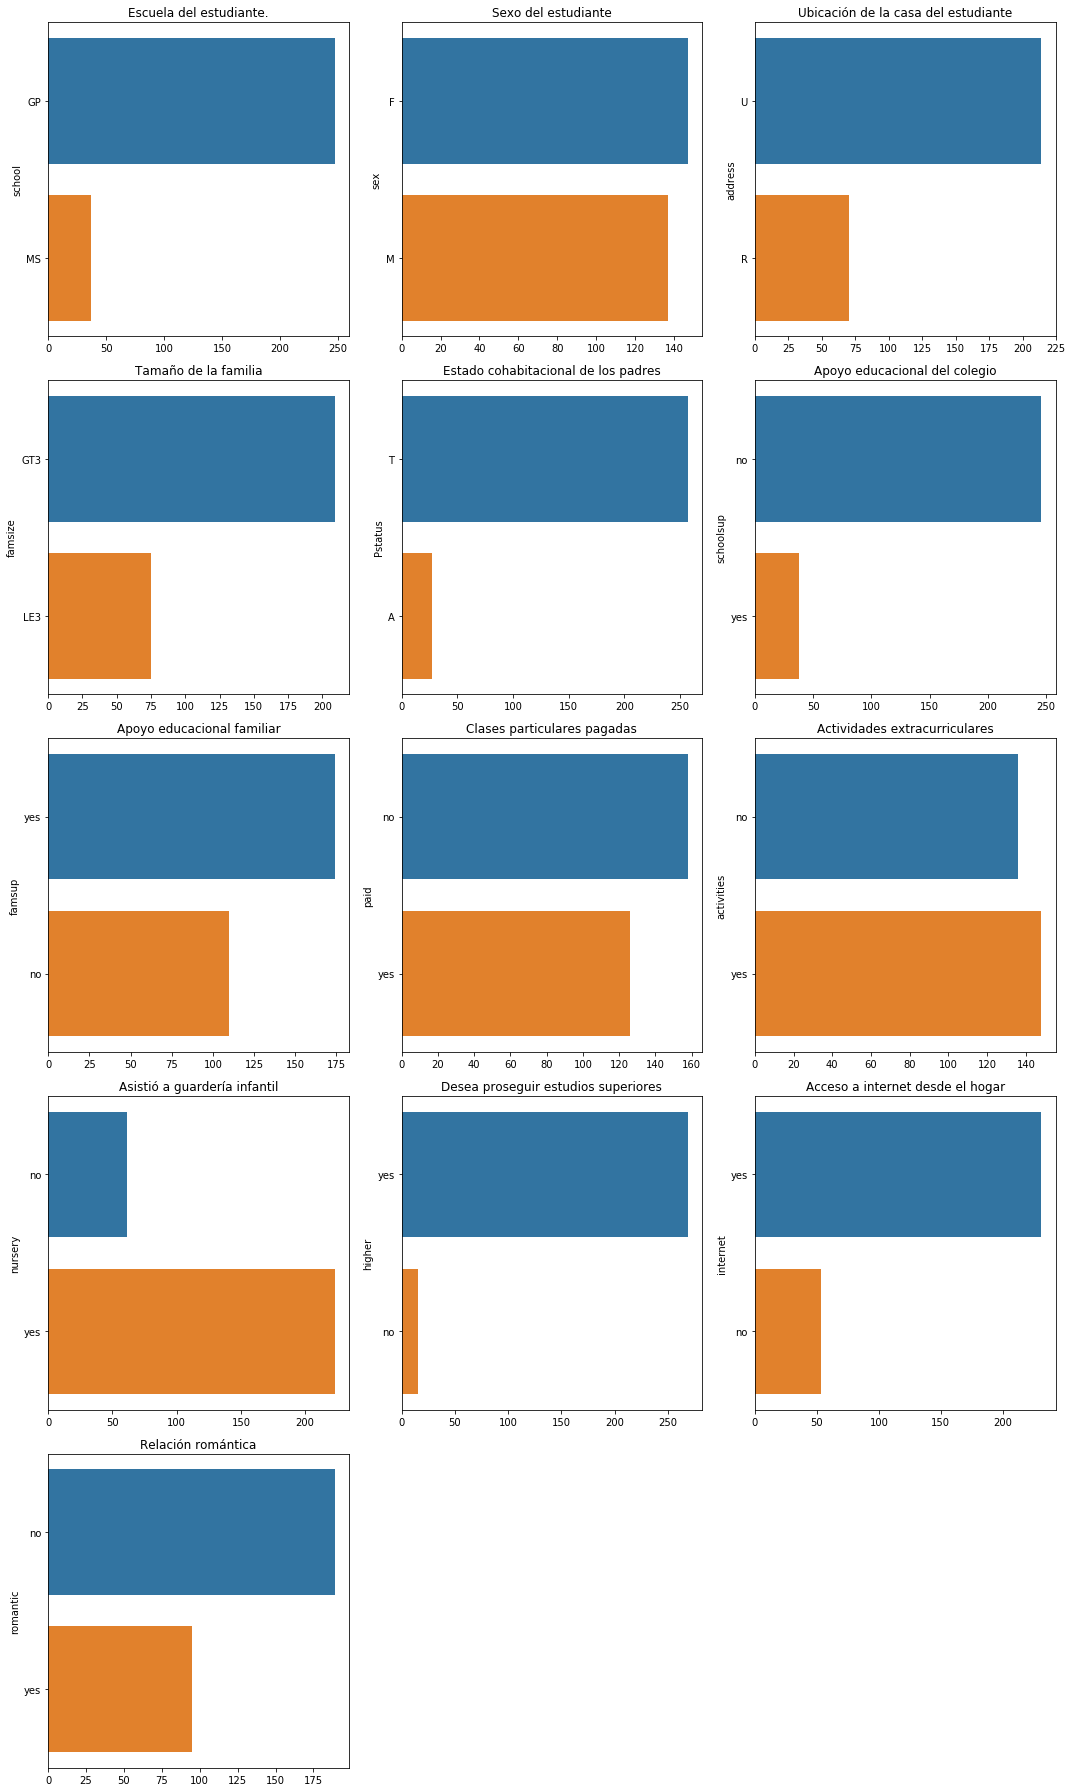

In [20]:
binary_columns = []

for col_name, col in data.iteritems():
    if col.value_counts().count() == 2:
        binary_columns.append(col_name)

nicos.plot_columns_behaviour(data[binary_columns])

En cuanto a las variables binarias, hay variables que están o muy balanceadas o muy desbalanceadas.

**Balanceadas**:
    
- Apoyo educacional familiar
- Clases particulares
- Actividades extracurriculares
- Sexo el estudiante

Para cada una de estas variables, aproximadamente la mitad de observaciones son `si` y la otra mitad son `no`.

**No balanceadas**:

- Apoyo educacional en el colegio: son pocos los que dicen haber tenido apoyo.
- Asistió a guardería infantil: la mayoría si asistió a guardería
- Desea proseguir estudios superiores: la mayoría desea proseguir con estudios superiores
- Acceso a internet desde el hogar: la mayoría tiene acceso a internet
- Relación romántica: la mayoría no tiene relaciones románticas
- Escuela del estudiante: la mayoría de las observaciones son de la escuela Gabriel Pereira
- Ubicación casa del estudiante: la mayoría está en zonas urbanas
- Tamaño de la familia: la mayoría vive con familia de tamaño mayor o igual a 3
- Estado cohabitacional de los padres: la mayoría de los padres de los estudiantes viven juntos

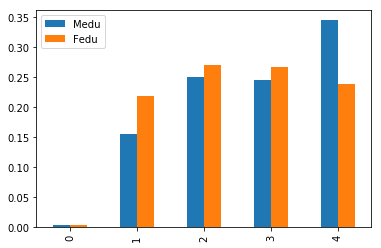

In [21]:
pd.concat([data['Medu'].value_counts('%').to_frame(), data['Fedu'].value_counts('%').to_frame()], axis=1).plot.bar();

Porcentualmente, las madres de los alumnos tienen un mayor nivel educacional en comparación a los padres.

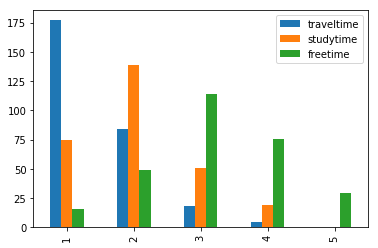

In [22]:
value_count_dfs = [data[x].value_counts().to_frame() for x in ['traveltime', 'studytime', 'freetime']]
pd.concat(value_count_dfs, axis=1).plot.bar();

- La mayoría de alumnos considera que tiene mucho tiempo libre
- La mayoría de alumnos considera que el tiempo de viaje al colegio es poco (< 15 minutos)
- La mayoría de alumnos considera que estudia poco (<3 horas)

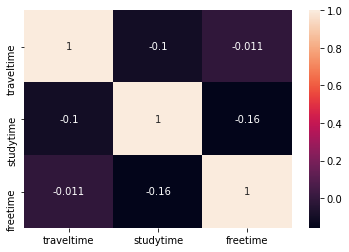

In [23]:
sns.heatmap(data[['traveltime', 'studytime', 'freetime']].corr(), annot=True);

Viendo las correlaciones entre estas tres, en realidad se ve una baja correlación entre estas variables. Cabe destacar que si bien hay poca, entre todas es negativa (mayor tiempo de viaje, menor tiempo de estudio).

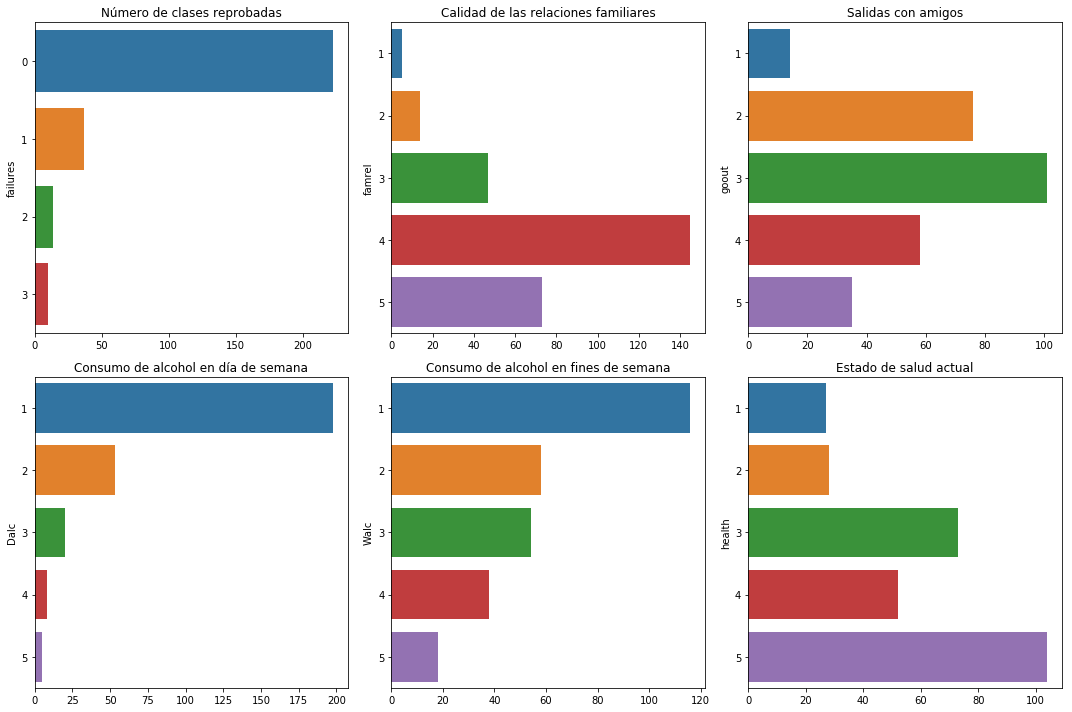

In [24]:
rest_of_colums = [
    'failures',
    'famrel',
    'goout',
    'Dalc',
    'Walc',
    'health',
]

nicos.plot_columns_behaviour(data[rest_of_colums])

- Si bien la mayoría de los alumnos no toma alcohol durante la semana, la distribución cambia cuando vemos el consumo de alchool los fines de semana.
- En cuanto a salud, la mayoría indica estar bien
- Las salidas con alumnos se ve que distribuye normal
- El número de clases reprobadas para la mayoría es 0
- La mayoría dice tener buenas relaciones familiares

La matriz de correlación entre las variables que tienen que ver con el consumo de alcohol:

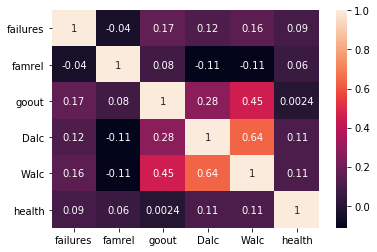

In [25]:
sns.heatmap(data[rest_of_colums].corr(), annot=True);

Al ver las correlaciones más altas podemos decir que:

- La correlación entre consumo de alchool en la semana y el fin de semana es > 0.5, lo cual tiene sentido pues alguien que toma en la semana es probable que también tome el fin de semana.
- Las salidas con amigos pueden influir en un aumento en de consumo de alchool, sobretodo los fin de semana (aunque la correlación es < 0.5)

De estas correlaciones, la más significativa es consumo de alcohol en la semana y el fin de semana.

Si vemos los promedios de estas variables:

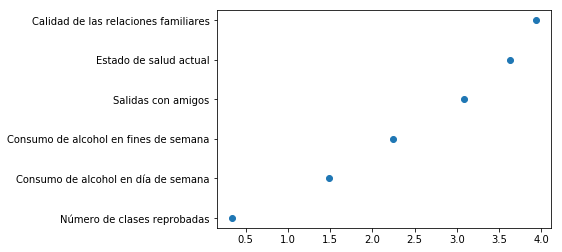

In [26]:
variable = []
mean = []

for colname, serie in data[rest_of_colums].iteritems():
    variable.append(nicos.humanize(colname))
    mean.append(serie.mean())

df_mean = pd.DataFrame({'var':variable, 'mean': mean}).sort_values(by=['mean'])
plt.plot(df_mean['mean'], df_mean['var'],'o');

Un sujeto promedio tendería a tener "buenos" indicadores: buena relación con los familiares, buen estado de salud actal, salidas con amigos, bajo consumo de alcohol durante la semana, sin clases reprobadas y un consumo moderado de alcohol el fin de semana.

#### Inspección visual de coreaciones entre vector objetivo y otras variables

Las principales correlaciones (a nivel global) las podemos ver en la siguiente imagen:

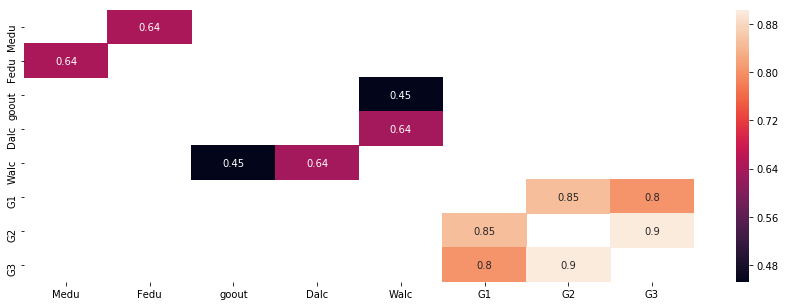

In [27]:
nicos.plot_main_correlations(data[numeric], 0.4)

Nada fuera de lo común:

- Hay una alta correlación entre G2 y G3, así como entre G1 y G2. La nota final debería depender de la nota de los dos primeros semestres.
- Existe una correlación entre nivel educacional de los padres y madres.
- Como vimos anteriormente, existe correlación entre beber alcohol en la semana y los fin de semanas, así como también salir con amigos con beber alchohol.

Mientras que las correlaciones más pequeñas (respecto a las notas) son:

In [28]:
M = data[numeric].corr()
threshold = 0.1
worst_corr = M[((M < threshold) & (M > -threshold))
              ].dropna(axis=0, how='all').dropna(axis=1, how='all')
worst_corr[['G1', 'G2', 'G3']].dropna(how='all')

,G1,G2,G3
age,-0.042289,NaN,NaN
traveltime,-0.078746,NaN,-0.091532
studytime,NaN,0.092907,0.066506
famrel,0.033950,-0.003285,0.069963
freetime,0.026875,0.011904,0.037968
Dalc,-0.080415,-0.061280,-0.052820
Walc,NaN,-0.079485,-0.033601
absences,-0.055033,-0.056140,0.013487


**¿Cómo varía el vector objetivo con las variables categóricas o binarias?**

Los siguientes gráficos muestran la distribución de cada nota en distintos grupos para las variables binarias pero sólo se muestran cuando existe suficiencia estadística para rechazar la hipótesis nula de que las medias son iguales en ambos grupos.

Usamos ahora el dataset que tenemos con todas las variables binarizadas:

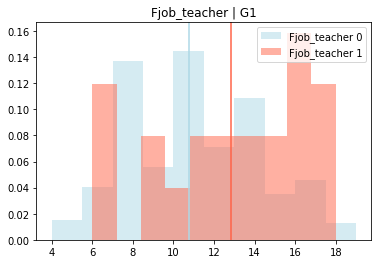

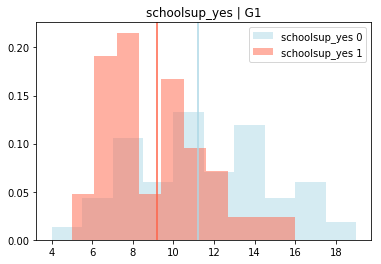

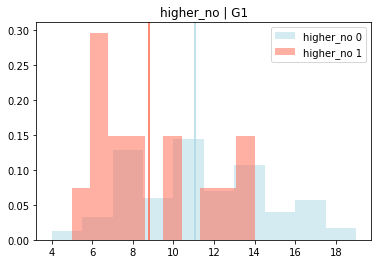

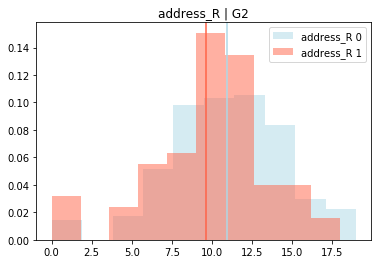

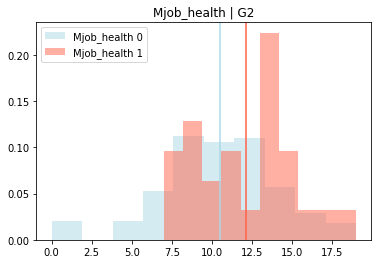

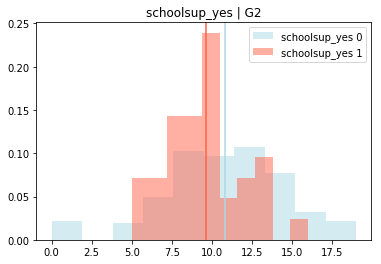

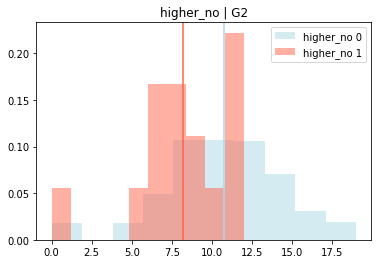

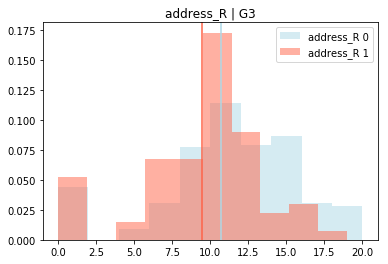

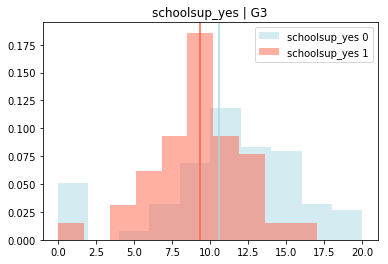

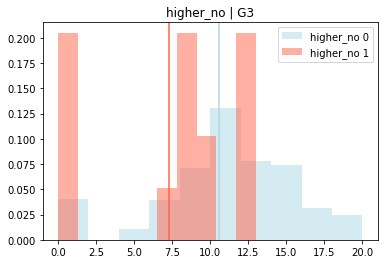

In [29]:
for grades in ['G1', 'G2', 'G3']:
    for binary in df.loc[:, 'school_MS': 'romantic_yes']:
        different_mean = nicos.run_hip_test(df, grades, binary)
        if different_mean:
            nicos.graph_hist(df, grades, binary)

**Observaciones**:

- Al parecer los alumnos que viven en zonas urbanas tienen mejor promedio en comparación con los que no viven en zonas urbanas.
- Los alumnos que quieren continuar con estudios superiores tienen mejor promedio en comparación con los que no.
- Por alguna razón, el promedio de la nota en el grupo de alumnos que prefirió un colegio por cursos es menor que en el resto.
- Los alumnos que dicen tener apoyo de la escuela tienen mayor promedio.

**¿Cómo se ven las principales correlaciones en el conjunto completo?**

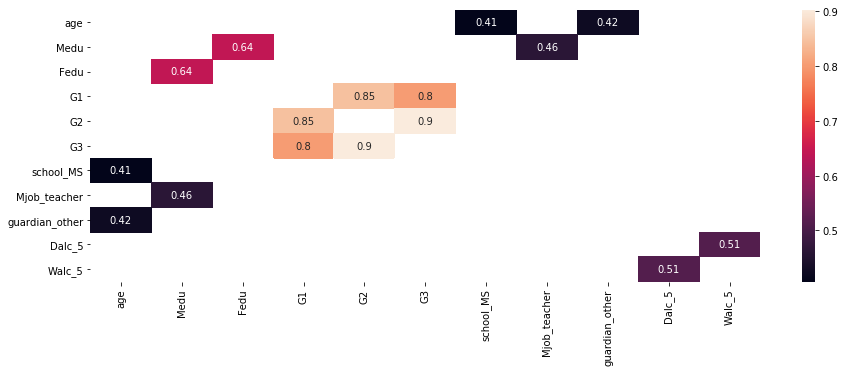

In [30]:
nicos.plot_main_correlations(df)

No se ve ninguna correlación importante para las notas, aunque muchos de los atributos son `boolean` (la correlación de Pearson no funciona muy bien en este caso).

4) Modelación descriptiva
---

### Modelación de regresión

El siguiente código crea para cada vector objetivo modelos de regresión iterando 3 veces sobre los regresores menos significativos. El primer modelo es el saturado, luego se quitan del modelo los regresores que no son significativos al 95%, y así sucesivamente.

In [31]:
models = {}
targets = ['G1', 'G2', 'G3']
iterations = 3

for target in targets:
    banned_coefs = []
    for i in range(1, iterations + 1):
        model = nicos.build_model(df, 'ols', target, *targets, *banned_coefs).fit()
        worst_p_values = list(nicos.not_significant_pvalues(model).index)
        for coef in worst_p_values:
            banned_coefs.append(coef)
        models[target + '_' + str(i)] = model

A continuación veremos los resultados de los modelos depurados para cada nota:

In [32]:
models['G1_3'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G1   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     14.52
Date:                Thu, 25 Jul 2019   Prob (F-statistic):           1.21e-12
Time:                        23:23:57   Log-Likelihood:                -707.68
No. Observations:                 284   AIC:                             1427.
Df Residuals:                     278   BIC:                             1449.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        11.2031      0.237     47.292      0.000      10.737      11.669
failures         -1.4815      0.243     -6.107      0.000      -1.959      -1.004
Fjob_teacher      1.9168      0.673      2.850      0.005       0.593       3.241
schoolsup_yes    -1.9942      0.516     -3.862      0.000      -3.011      -0.978
freetime_5        1.6350      0.587      2.783      0.006       0.479       2.791
studytime_3       1.0230      0.462      2.214      0.028       0.113       1.933
==============================================================================
Omnibus:                        6.728   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.035   Jarque-Bera (JB):                4.708
Skew:                           0.177   Prob(JB):                       0.0950
Kurtosis:                       2.478   Cond. No.                         4.33
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
models['G2_3'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G2   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     15.57
Date:                Thu, 25 Jul 2019   Prob (F-statistic):           2.15e-09
Time:                        23:23:58   Log-Likelihood:                -758.90
No. Observations:                 284   AIC:                             1526.
Df Residuals:                     280   BIC:                             1540.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.1779      0.242     46.233      0.000      10.702      11.654
failures      -1.5912      0.295     -5.399      0.000      -2.171      -1.011
freetime_5     2.1703      0.725      2.993      0.003       0.743       3.598
goout_5       -1.8374      0.681     -2.699      0.007      -3.177      -0.497
==============================================================================
Omnibus:                       13.697   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.688
Skew:                          -0.441   Prob(JB):                     0.000392
Kurtosis:                       3.740   Cond. No.                         4.24
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
models['G3_3'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     17.62
Date:                Thu, 25 Jul 2019   Prob (F-statistic):           1.67e-10
Time:                        23:23:58   Log-Likelihood:                -809.21
No. Observations:                 284   AIC:                             1626.
Df Residuals:                     280   BIC:                             1641.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.0677      0.289     38.346      0.000      10.500      11.636
failures      -2.0799      0.352     -5.912      0.000      -2.772      -1.387
freetime_5     2.7398      0.866      3.165      0.002       1.036       4.444
goout_5       -2.0883      0.813     -2.570      0.011      -3.688      -0.489
==============================================================================
Omnibus:                       21.168   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.943
Skew:                          -0.645   Prob(JB):                     6.32e-06
Kurtosis:                       3.599   Cond. No.                         4.24
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Saturados vs Depurados

In [35]:
print('Para los modelos saturados:')

for target in targets:
    print('\n==', target, '==')
    print('rsquared: ', models[target + '_1'].rsquared)
    print('rsquared_adj: ', models[target + '_1'].rsquared_adj)

Para los modelos saturados:

== G1 ==
rsquared:  0.4094717059865769
rsquared_adj:  0.24720942700090653

== G2 ==
rsquared:  0.37346402526325906
rsquared_adj:  0.20130774391667705

== G3 ==
rsquared:  0.384165933004056
rsquared_adj:  0.21495026594661182


`R-squared` para los modelos saturados de G1, G2 y G3 es 41%, 37% y 38%, respectivamente. Pero notar que la versión `adj` para todos está cercano al 20%, por lo hay evidencia para decir que el modelo tiene variables sobrantes.

Al analizar el modelo menos saturado:

In [36]:
print('Para los modelos menos saturados:')

for target in targets:
    print('\n==', target, '==')
    print('rsquared: ', models[target + '_3'].rsquared)
    print('rsquared_adj: ', models[target + '_3'].rsquared_adj)

Para los modelos menos saturados:

== G1 ==
rsquared:  0.20704029872953955
rsquared_adj:  0.19277843359877578

== G2 ==
rsquared:  0.1429681638744098
rsquared_adj:  0.13378567991592138

== G3 ==
rsquared:  0.15876871830726502
rsquared_adj:  0.14975552600341435


Aquí vemos que hay una gran diferencia, sobre todo para G2 y G3.

Este resultado quiere decir que los regresores pueden explicar en un 21%, 14% y en un 16% a G1, G2 y G3 respectivamente.

### Interpretación de los principales regresores

Ahora analizaremos los principales regresores considerando los que están presentes en los modelos depurados de cada promedio.

In [37]:
for target in targets:
    print('\n==', target, '==')
    print(models[target + '_3'].params)


== G1 ==
Intercept        11.203098
failures         -1.481461
Fjob_teacher      1.916801
schoolsup_yes    -1.994233
freetime_5        1.635012
studytime_3       1.022974
dtype: float64

== G2 ==
Intercept     11.177937
failures      -1.591199
freetime_5     2.170313
goout_5       -1.837405
dtype: float64

== G3 ==
Intercept     11.067702
failures      -2.079919
freetime_5     2.739811
goout_5       -2.088271
dtype: float64


Aquí podemos ver que `failures` (cantidad de cursos reprobados) es un regresor que está en todos los modelos.

#### Notas primer semeste (G1)

- `failures`: por cada vez que el alumno ha reprobado un curso, el promedio G1 disminuye en 1.5 puntos.
- `Fjob_teacher`: el promedio aumenta en casi dos puntos cuando el padre es profesor.
- `schoolsup_yes`: el promedio disminuye en casi dos puntos cuando los alumnos recibieron ayuda del colegio.
- `freetime_5`: los alumnos que dicen tener más tiempo, la nota aumenta en 1.6.
- `studytime_3`: los alumnos que estudian de 3 a 5 horas, la nota aumenta en 1 punto.


#### Notas segundo semeste (G2)

- `failures`: cada vez que el alumno ha reprobado un curso, el promedio G2 disminuye en 1.6 puntos
- `freetime_5`: los alumnos que tienen mucho tiempo libre tienen un promedio 2.2 mayor.
- `goout_5`: para alumnos que salen mucho con sus amigos, su promedio es 1.8 menor.

#### Nota final (G3)

Aquí quedaron los mismos regresores que en G2, pero con valores mayores:
    
- `failures`: cada vez que el alumno ha reprobado un curso, el promedio G3 disminuye en 2.1 puntos
- `freetime_5`: los alumnos que tienen mucho tiempo libre tienen un promedio 2.7 mayor.
- `goout_5`: para alumnos que salen mucho con sus amigos, su promedio es 2.1 menor.

### Categorías latentes

In [38]:
df_questions = df3.dropna().loc[:, 'famrel':'health'].infer_objects()
df_questions.head(3)

,famrel,freetime,goout,Dalc,Walc,health
1,5,3,3,1,1,3
3,3,2,2,1,1,5
5,5,4,2,1,2,5


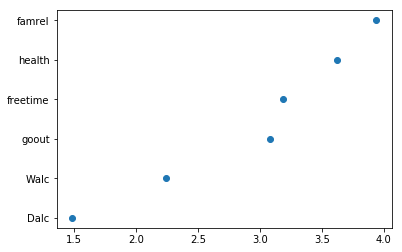

In [39]:
def plot_column_mean(df):
    columns = []
    mean = []

    for colname, serie in df.iteritems():
        columns.append(colname)
        mean.append(serie.mean())

    df_means = pd.DataFrame({'var': columns, 'mean': mean}).sort_values(by=['mean'])
    plt.plot(df_means['mean'], df_means['var'],'o')

plot_column_mean(df_questions)

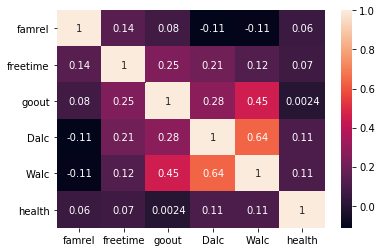

In [40]:
sns.heatmap(df_questions.corr(), annot=True);

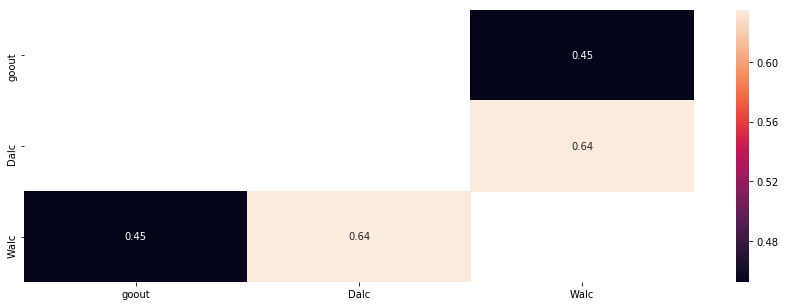

In [41]:
nicos.plot_main_correlations(df_questions)

In [42]:
factor.calculate_bartlett_sphericity(df_questions)

(258.5684035558002, 1.010339288896483e-46)

En este caso, la prueba de esferacidad de errores sugiere que la matriz de correlaciones no es igual a la matriz de identidad, por lo que se puede seguir con el análisis.

In [43]:
factor.calculate_kmo(df_questions)

(               KMO
 famrel    0.503497
 freetime  0.578644
 goout     0.618506
 Dalc      0.588351
 Walc      0.557151
 health    0.594361, 0.5784452766434522)

Podemos ver que no hay ninguno que esté sobre 0.7

In [44]:
def factorize(df, n_factors, rotation=None):

    # Generamos una nueva instancia en el objeto factorize
    factor_analyzer = factor.FactorAnalyzer()

    # Implementamos el análisis
    factor_analyzer.analyze(data=df, n_factors=n_factors, rotation=rotation)

    # extraemos los eigenvalues
    factor_screeplot = factor_analyzer.get_eigenvalues()[0]

    # graficamos los eigenvalues contra la cantidad de dimensiones estimables
    plt.plot(factor_screeplot.index + 1, factor_screeplot.values, 'o-', color='tomato')
    plt.xlabel('Número de Factor')
    plt.ylabel('Valores Propios')

    # visualizamos el criterio de corte
    plt.axhline(1)
    plt.title("Scree plot")

    return factor_analyzer

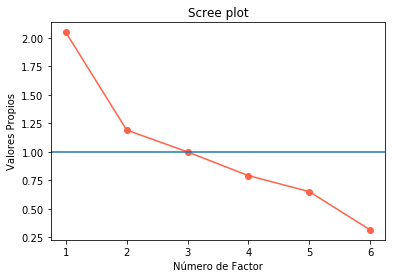

In [45]:
factorize(df_questions, 6)

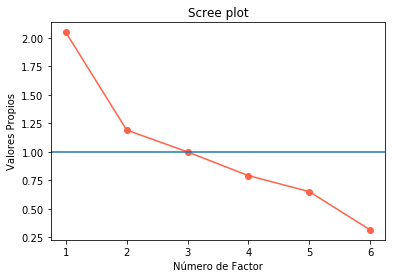

In [46]:
refactorize = factorize(df_questions, 3, 'promax')

In [47]:
refactorize.loadings.applymap(lambda x: np.where(x < .4, ' ', round(x, 2)))

,Factor1,Factor2,Factor3
famrel,,,0.46
freetime,,,
goout,,0.94,
Dalc,0.91,,
Walc,0.7,,
health,,,


De aquí podemos ver que:
    
- `Factor1`: está asociado al consumo de alcohol.
- `Factor2`: está asociado a las salidas con amigos.
- `Factor3`: está asociado a las relaciones familiares.

Ahora crearemos un modelo para predecir G3 utilizando estos factores en vez de las variables de la encuesta:

In [48]:
df_final = df.reset_index().drop(columns=[
    'index', 
    'Dalc_2', 'Dalc_3', 'Dalc_4', 'Dalc_5',
    'famrel_5', 'famrel_3', 'famrel_2', 'famrel_1',
    'Walc_2', 'Walc_3', 'Walc_4', 'Walc_5',
    'goout_2','goout_4', 'goout_5', 'goout_1',
])

scores = refactorize.get_scores(df_questions)

df_with_factors = pd.concat([df_final, scores], axis=1)

model_with_factors = {}
iterations = 3

banned_coefs = ['G1', 'G2', 'G3']
for i in range(1, iterations + 1):
    model = nicos.build_model(df_with_factors, 'ols', 'G3', *banned_coefs).fit()
    worst_p_values = list(nicos.not_significant_pvalues(model).index)
    for coef in worst_p_values:
        banned_coefs.append(coef)
    model_with_factors['G3_' + str(i)] = model
model_with_factors['G3_3'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     19.60
Date:                Thu, 25 Jul 2019   Prob (F-statistic):           1.47e-11
Time:                        23:24:01   Log-Likelihood:                -806.70
No. Observations:                 284   AIC:                             1621.
Df Residuals:                     280   BIC:                             1636.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.8626      0.282     38.487      0.000      10.307      11.418
failures      -2.0847      0.346     -6.033      0.000      -2.765      -1.405
freetime_5     2.2433      0.824      2.722      0.007       0.621       3.866
Factor2       -0.8723      0.255     -3.423      0.001      -1.374      -0.371
==============================================================================
Omnibus:                       22.219   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.425
Skew:                          -0.662   Prob(JB):                     3.01e-06
Kurtosis:                       3.631   Cond. No.                         3.71
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

En este caso, usando el factor, llegamos a un `rsquared` de 17% con `adj-rsquared` de 17%. Enfocándonos solo en esto, este modelo se comporta un poco mejor que el modelo anterior.

### Definición de las estrategias de Modelación predictiva

#### Paso 1: preparación

importación de módulos y definición de funciones auxiliares para el problema.

Luego, para cada uno de nuestros modelos:

- Haremos una división de la muestra (paso 2)
- Generaremos objeto y modelo (paso 3)

#### Paso 2:  división de la muestra. 

Primero, obtendremos una muestra con los atributos necesarios para el modelo de prediccón, y la estandarizaremos con StandardScaler (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

La muestra estandarizada será dividida en dos sets:

1. Training Set: Donde implementamos el modelo.
2. Test Set: Donde probamos el modelo.

Utilizaremos la función `train_test_split` con un 33% para generar los siguientes objetos:

1. Matriz de Atributos en Training Set: X_train
2. Vector Objetivo en Training Set: y_train
3. Matriz de Atributos en Testing Set: X_test
4. Vector Objetivo en Testing Set: y_test

#### Paso 3: Generar objeto y modelo

El siguiente paso es la construcción de un objeto que contenga las instrucciones a ejecutar en el
modelo, en este caso con la clase `LinearRegression`.

Una vez tengamos una instancia de dicha clase, debemos entrenarlo con la función `fit`, la cual solicita la matriz `X_train` y el vector objetivo `y_train`.

#### Paso 4: Generar métricas

Finalmente, es necesario juzgar qué tan bien se comportó nuestro modelo al predecir los valores
del vector objetivo de nuestro testing set.

Como se comentó al comienzo, se utilizarán las siguientes métricas:

- Promedio del Error Cuadrático (Mean Squared Error): Representa la expectativa del error cuadrático. Es un indicador de calidad con valores no negativos, donde menores valores indican mejores niveles de ajuste.
- R-cuadrado: Representa la capacidad explicativa de nuestro conjunto de atributos en la variabilidad de nuestro vector objetivo. Tiene la misma interpretación que la enseñada desde la econometría.

En base al MSE y R-cuadrado podremos evaluar cual de los modelos que creamos es mejor. Buscaremos el modelo que tenga un menor `MSE` y un mayor `R-cuadrado`.

5) Modelación predictiva
--

### Preparación ambiente de trabajo

Principalmente utilizaremos `scikit-learn`, una librería diseñada para implementar modelos de minería de
datos y machine learning de manera simple y efectiva.

Esta librería ya fue importada, aunque definiremos funciones a continuación que ayudarán con el resto de la modelación predictiva:

In [49]:
def report_scores(name, prediction, validation):
    print(name)
    mse = mean_squared_error(prediction, validation)
    print('MSE: {}'.format(mse))
    
    r2 = r2_score(prediction, validation)
    print('R2: {}\n'.format(r2))
    
    return mse, r2

### Implementación de modelos predictivos

#### Separación de datos de prueba y datos de entrenamiento

In [50]:
standard_scaler = StandardScaler()
df_scaled = pd.DataFrame(standard_scaler.fit_transform(df), columns = df.columns)
random_state = 24072019
X_train, X_test, y_train, y_test = train_test_split(df_scaled, df.loc[:, 'G3'], test_size=0.33, random_state=random_state)

#### Modelo 1 y Modelo 2

Para estos modelos, utilizaré los atributos `failures`, `freetime_5` y `goout_5` que corresponden al modelo depurado en la descripción econométrica luego de descartar los regresores no significativos (al 95%).

La diferencia es que uno de ellos va a ser normalizado y el otro no.

In [51]:
attrs = ['failures', 'freetime_5', 'goout_5']

model_1 = LinearRegression(fit_intercept=True, normalize=True)
model_2 = LinearRegression(fit_intercept=False, normalize=False)

model_1.fit(X_train.loc[:, attrs], y_train)
model_2.fit(X_train.loc[:, attrs], y_train)

model_1_yhat = model_1.predict(X_test.loc[:, attrs])
model_2_yhat = model_2.predict(X_test.loc[:, attrs])

model_1_scores = report_scores('Modelo 1', y_test, model_1_yhat)
model_2_scores = report_scores('Modelo 2', y_test, model_2_yhat)

Modelo 1
MSE: 21.095962731624372
R2: 0.10374109675626031

Modelo 2
MSE: 138.56022846571568
R2: -4.8867111199301085



#### Modelo 3 y Modelo 4

Desde el punto econométrico, podemos ver que hay una alta correlación entre todas las notas. Es por esto que para estos modelos, se utilizarán los mismos atributos que en los anteriores pero además se incluirá las notas `G2`.

¿Por qué solo G2? porque lo que aprendes un semestre te sirve de base para los siguientes. Entonces `G2` no es independiente de `G1`, y está dependencia podría producir ruido en el resultado del modelo, ya que la regresión asume independencia entre las variables dependientes.

In [52]:
attrs = ['failures', 'freetime_5', 'studytime_3', 'G2']

model_3 = LinearRegression(fit_intercept=True, normalize=True)
model_4 = LinearRegression(fit_intercept=False, normalize=False)

model_3.fit(X_train.loc[:, attrs], y_train)
model_4.fit(X_train.loc[:, attrs], y_train)

model_3_yhat = model_3.predict(X_test.loc[:, attrs])
model_4_yhat = model_4.predict(X_test.loc[:, attrs])

model_3_scores = report_scores('Modelo 3', y_test, model_3_yhat)
model_4_scores = report_scores('Modelo 4', y_test, model_4_yhat)

Modelo 3
MSE: 3.8007668879537846
R2: 0.8385249724879332

Modelo 4
MSE: 116.59637717572723
R2: -3.9535800977244255



### Mejor modelo predictivo en base a los resultados

Al graficar los errores, podemos concluir que:

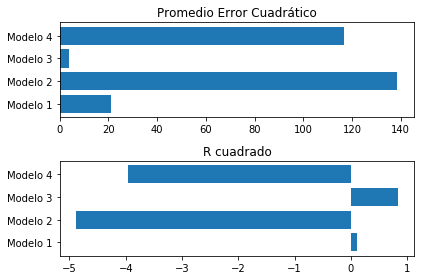

In [53]:
plt.subplot(2,1,1)

mse = [model_1_scores[0], model_2_scores[0], model_3_scores[0], model_4_scores[0]]
r2 = [model_1_scores[1], model_2_scores[1], model_3_scores[1], model_4_scores[1]]

plt.barh(['Modelo 1', 'Modelo 2', 'Modelo 3', 'Modelo 4'], mse)
plt.title("Promedio Error Cuadrático")

plt.subplot(2,1, 2)
plt.barh(['Modelo 1', 'Modelo 2', 'Modelo 3', 'Modelo 4'], r2)
plt.title("R cuadrado");
plt.tight_layout()

- Los modelos normalizados tienen mejor rendimiento (Modelo 1 y Modelo 3) ya que el MSE es menor y el R2 el mayor.
- Pero entre estos dos, el Modelo 3 tiene un MSE mucho menor y un R2 muchísimo mayor, por lo que existe evidencia para preferirlo.

En los análisis previos, pudimos ver que hay una alta correlación entre las notas, las cuales no consideré dentro del análisis descriptivo porque no creo que exista independencia entre variables (lo que aprendes en un semestre te ayuda para los siguientes semestres).

Si bien el mejor modelo es el _Modelo 3_ (en base a estos resultados), no está muy claro cuál es el significado de las columnas de las notas. Algunas posibilidades son:

- Notas de distintos semestres
- Notas de distintos años
- Un promedio de curso tomado a distintas alturas durante un año

En cualquiera de estos casos, puede darse que la nota `G2`, considerada en _Modelo 3_, sea dependiente del resto de variables, lo cual va en contra del principio de independencia de la regresión lineal.